In [1]:
#import pyCellPhenoX
import sys
sys.path.append('/Users/zhanglab_mac2/Documents/GitHub/pyCellPhenoX')
import pyCellPhenoX.CellPhenoX
import pyCellPhenoX.preprocessing
from pyCellPhenoX.neighborhoodAbundanceMatrix import neighborhoodAbundanceMatrix
import pyCellPhenoX.nonnegativeMatrixFactorization
import pyCellPhenoX.principalComponentAnalysis

import pandas as pd

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# paths to expression data and meta data files
expression_file = "/Users/zhanglab_mac2/Documents/GitHub/pyCellPhenoX/vignettes/example_UC_data/fibroblast_exp.csv"
meta_file = "/Users/zhanglab_mac2/Documents/GitHub/pyCellPhenoX/vignettes/example_UC_data/fibroblast_met.csv"
output_path = "./output/"
# read in data
expression_mat = pd.read_csv(expression_file, index_col=0).T
meta = pd.read_csv(meta_file, index_col=0)

In [3]:
print(expression_mat.shape)
print(meta.shape)

(14822, 5494)
(14822, 9)


In [4]:
meta.head()

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,fibroblast_clusters
0,N7.LPA.AAACATACCATTTC,N7,Non-inflamed,LP,WNT2B+ Fos-lo 1,550.0,1118.0,0.029517,WNT2B
1,N7.LPA.AAACGCTGTATCGG,N7,Non-inflamed,LP,Myofibroblasts,636.0,1312.0,0.025915,Myofibroblasts
2,N7.LPA.AAAGACGAGACAGG,N7,Non-inflamed,LP,WNT2B+ Fos-hi,1030.0,2594.0,0.021982,WNT2B
3,N7.LPA.AAAGATCTAGTCTG,N7,Non-inflamed,LP,WNT2B+ Fos-hi,707.0,1769.0,0.019220,WNT2B
4,N7.LPA.AAATACTGCTGGAT,N7,Non-inflamed,LP,WNT2B+ Fos-hi,786.0,1921.0,0.021365,WNT2B


In [5]:
#nam = neighborhoodAbundanceMatrix(expression_mat=expression_mat, meta_data=meta, sampleid="sample")

In [6]:
nam = pd.read_csv("/Users/zhanglab_mac2/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/Zhang_Lab/Research/shap/cell_neighborhood_abundance/NAM_cellXnbhd.csv", index_col=0)
nam.head()

,N7.LPA.AAACATACCATTTC,N7.LPA.AAACGCTGTATCGG,N7.LPA.AAAGACGAGACAGG,N7.LPA.AAAGATCTAGTCTG,N7.LPA.AAATACTGCTGGAT,N7.LPA.AAATGGGAAAGTAG,N7.LPA.AAATGTTGGTTACG,N7.LPA.AACACGTGGAGAGC,N7.LPA.AACCAGTGATCGTG,N7.LPA.AACCGATGGAGAGC,...,N110.LPB.TTCCCAGTCAACGCTA,N110.LPB.TTCTCAAAGTGCGTGA,N110.LPB.TTCTCAATCCGTTGTC,N110.LPB.TTCTTAGCAGCTATTG,N110.LPB.TTGAACGCAATGACCT,N110.LPB.TTGAACGGTCTGATTG,N110.LPB.TTGGAACAGAGCTTCT,N110.LPB.TTGGAACCAATCTACG,N110.LPB.TTGTAGGCAGAGTGTG,N110.LPB.TTTCCTCCATGCAATC
N7.LPA.AAACATACCATTTC,0.000073,0.000026,0.000053,0.000046,0.000037,0.000050,0.000053,0.000044,0.000061,0.000050,...,0.000023,0.000025,0.000032,0.000019,0.000016,0.000034,0.000019,0.000024,0.000029,0.000025
N7.LPA.AAACGCTGTATCGG,0.000026,0.000097,0.000034,0.000026,0.000024,0.000036,0.000037,0.000027,0.000030,0.000033,...,0.000016,0.000018,0.000023,0.000043,0.000049,0.000025,0.000050,0.000035,0.000040,0.000018
N7.LPA.AAAGACGAGACAGG,0.000053,0.000034,0.000078,0.000049,0.000037,0.000053,0.000047,0.000047,0.000055,0.000049,...,0.000023,0.000025,0.000032,0.000026,0.000023,0.000035,0.000026,0.000031,0.000035,0.000026
N7.LPA.AAAGATCTAGTCTG,0.000046,0.000026,0.000049,0.000064,0.000042,0.000042,0.000033,0.000048,0.000041,0.000039,...,0.000041,0.000043,0.000051,0.000023,0.000018,0.000053,0.000023,0.000033,0.000030,0.000042
N7.LPA.AAATACTGCTGGAT,0.000037,0.000024,0.000037,0.000042,0.000069,0.000037,0.000037,0.000043,0.000036,0.000039,...,0.000045,0.000046,0.000055,0.000023,0.000018,0.000054,0.000026,0.000034,0.000029,0.000046


In [7]:
# get the latent dimensions using NMF
latent_features = pyCellPhenoX.nonnegativeMatrixFactorization(nam, numberOfComponents=4, min_k=3, max_k=5)

inside the NMF function


In [8]:
X,y = pyCellPhenoX.preprocessing(latent_features, meta, sub_samp=False, bal_col=["subject_id", "cell_type", "disease"], subset_percentage=0.25 , target="disease", covariates=[], interaction_covs=[])
X.head()

,LD_1,LD_2,LD_3,LD_4
0,0.009308,0.000000,0.001079,0.000979
1,0.003498,0.006898,0.000760,0.000000
2,0.009174,0.000690,0.001217,0.000000
3,0.006249,0.000114,0.002191,0.000024
4,0.004989,0.000571,0.002303,0.000273


entering CV loop

------------ CV Repeat number: 1

------ Fold Number: 1
--- Accuracy:  0.7589556769884639
--- Validation Accuracy:  0.8371269600404654  - Validation AUROC:  0.906510750194665  - Val AUPRC:  0.9319760696879232

------ Fold Number: 2
--- Accuracy:  0.7623962760574783
--- Validation Accuracy:  0.8730399595346484  - Validation AUROC:  0.9506476072147357  - Val AUPRC:  0.9688343084059845

------ Fold Number: 3
--- Accuracy:  0.7562753036437248
--- Validation Accuracy:  0.8148710166919575  - Validation AUROC:  0.8948686063679958  - Val AUPRC:  0.9241212208127081


ValueError: zero-dimensional arrays cannot be concatenated

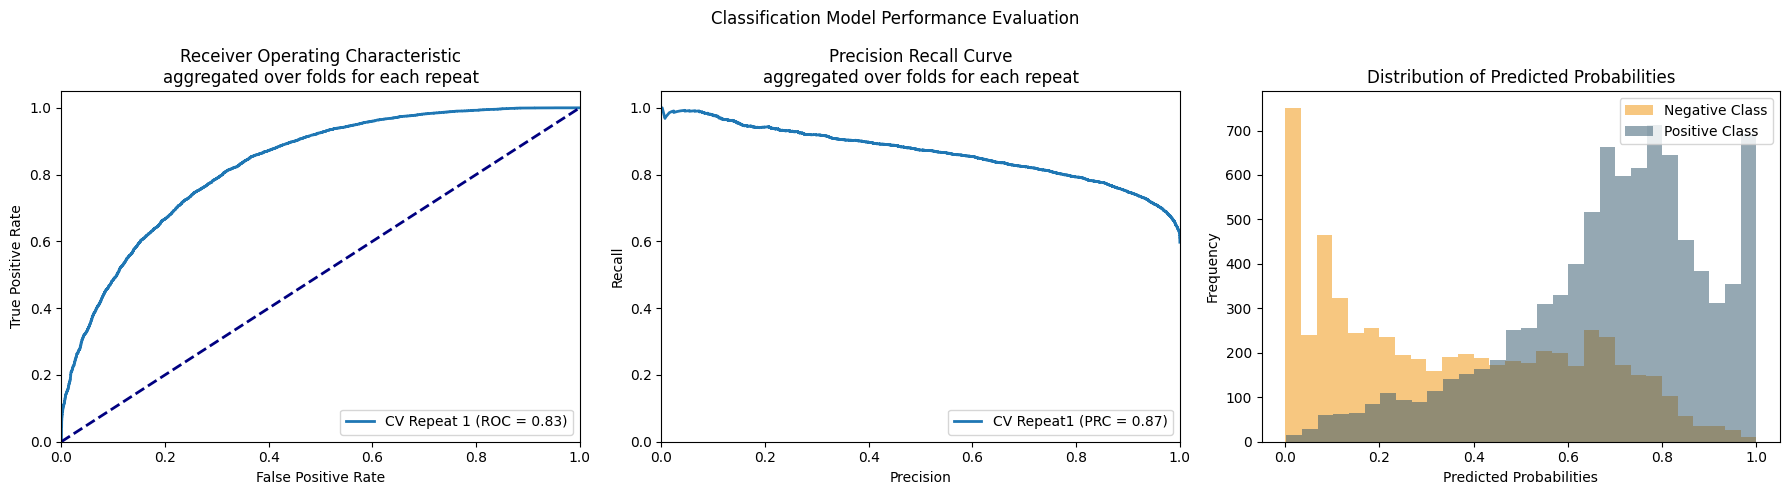

In [9]:
# create CellPhenoX object 
cellpx_obj = pyCellPhenoX.CellPhenoX(X, y, CV_repeats=1, outer_num_splits=3, inner_num_splits=2)
# and then train the classification model
cellpx_obj.model_training_shap_val(outpath = "/Users/zhanglab_mac2/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/Zhang_Lab/Research/shap/xcell/xcell_tutorial/xcell_results/ulcerative_colitis")

In [ ]:
cellpx_obj.shap_df

In [ ]:
# VISUALIZATION
import pyCellPhenoX.marker_discovery

In [ ]:
results_df = pd.concat(cellpx_obj.shap_df,meta)

In [ ]:
pyCellPhenoX.marker_discovery.plot_interpretablescore_boxplot(data=results_df, x="fibroblast_clusters", y='interpretable_score')